# Data Analyst Internship
## Clootrack
### Dataset: http://bit.ly/2Nm6L1d

In this notebook, we shall perform basic sentiment analysis on a customer review dataset.
We begin with exploring the dataset, some data preprocessing followed by data wrangling.
Then we visualize it and finally, we perform sentiment analysis to analyze whether the reviews are positive, negative or neutral.

**Importing the required libraries**

In [1]:
import pandas as pd
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Tabish Ali
[nltk_data]     Ansari\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

pip install nltk vaderSentiment pandas

pip install wordcloud matplotlib

**Reading the dataset and importing it from a csv file into a python pandas dataframe**

In [3]:
#reading the dataset
data = pd.read_csv(r"D:\AISSMS IOIT - AI&DS (628299510)\General\Hackathons\Tata Technologies\Data Analyst - Test Data - US.csv")

In [4]:
data.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [5]:
data.tail()

,Review,date,Location
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America
6444,·the internet barely worked or didn't work,2019/07/12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America
6447,"·staff, free coffee, location and activities.\...",2019/07/10,United States of America


# Data Preprocessing and Wrangling

In [6]:
data.shape

(6448, 3)

In [7]:
data.columns

Index(['Review', 'date', 'Location'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.3+ KB


In [9]:
data.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

In [10]:
data.duplicated().sum()

4

In [11]:
data["date"].min()

'2018/08/01'

In [12]:
data["date"].max()

'Sep 2018'

In [13]:
data["date"] = pd.to_datetime(data["date"], errors = "coerce").dt.date

In [14]:
type(data["date"].iloc[1])

datetime.date

In [15]:
df = data.sort_values(by = ["date"], ascending = True).copy().reset_index(drop = True)

In [16]:
df.head()

,Review,date,Location
0,At the Wyndham grand bonnet creek. It was ever...,2018-08-01,NaN
1,Wyndham Grand Orlando Resort Bonnet Creek is a...,2018-08-01,NaN
2,I was there for the FSOMA conference and had a...,2018-08-01,NaN
3,The hidden fees added up to $70 per a night. J...,2018-08-01,NaN
4,I was very pleased with Resort. It’s a beautif...,2018-08-01,NaN


In [17]:
df.iloc[0]

Review      At the Wyndham grand bonnet creek. It was ever...
date                                               2018-08-01
Location                                                  NaN
Name: 0, dtype: object

In [18]:
df.iloc[-1]

Review      My family stayed at The New Yorker for Cosmopo...
date                                                      NaT
Location                                                  NaN
Name: 6447, dtype: object

# Data Analysis and Visualization

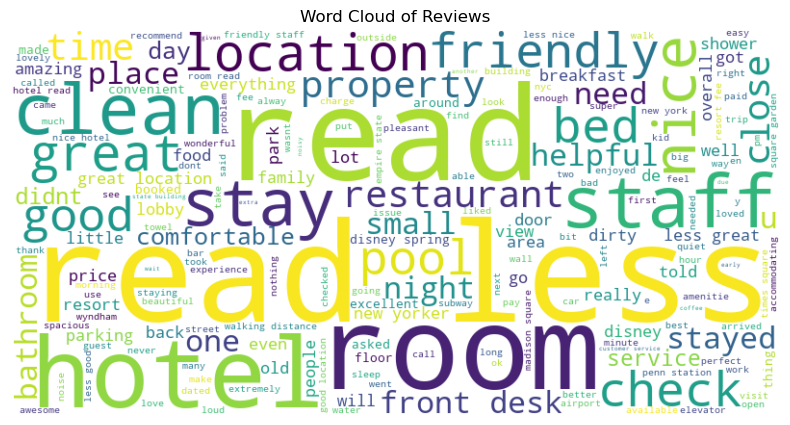

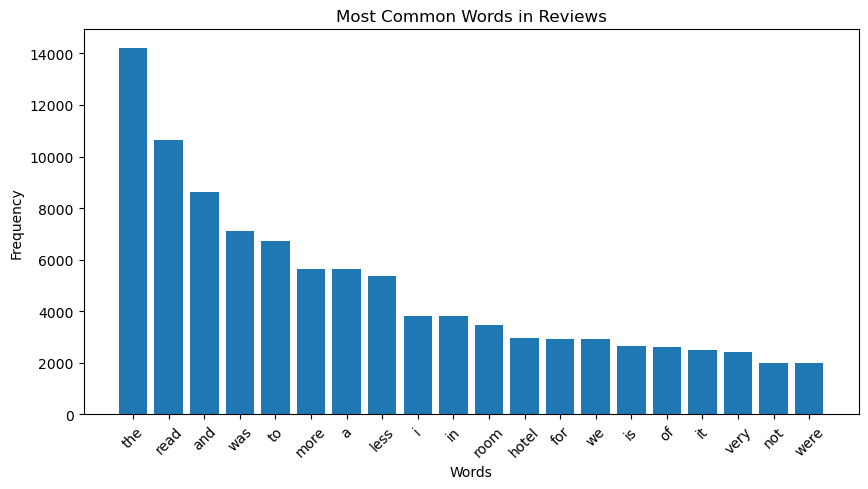

In [19]:
# Basic text cleaning function
def clean_text(text):
    if isinstance(text, float):
        return ''
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

# Converting all entries to strings and cleaning them
df['cleaned_review'] = df['Review'].astype(str).apply(clean_text)

# Generating a word cloud
all_words = ' '.join(df['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# Most common words
word_freq = Counter(all_words.split())
common_words = word_freq.most_common(20)

# Bar plot of common words
words, frequencies = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xticks(rotation=45)
plt.title('Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Sentiment Analysis using Natural Language Processing

In [20]:
analyzer = SentimentIntensityAnalyzer()

In [21]:
data["Review"].isnull().sum()

55

In [22]:
data["Review"].fillna("Null", inplace = True)

In [23]:
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores

data['sentiment_scores'] = data['Review'].apply(analyze_sentiment)

In [24]:
def sentiment_label(score):
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['sentiment_scores'].apply(sentiment_label)

In [25]:
data.head()

,Review,date,Location,sentiment_scores,sentiment
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...",Positive
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,"{'neg': 0.086, 'neu': 0.667, 'pos': 0.248, 'co...",Positive
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",Positive
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,"{'neg': 0.069, 'neu': 0.836, 'pos': 0.095, 'co...",Positive
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,"{'neg': 0.0, 'neu': 0.542, 'pos': 0.458, 'comp...",Positive


# Results

In [26]:
data["sentiment"].value_counts()

sentiment
Positive    4423
Negative    1266
Neutral      759
Name: count, dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review            6448 non-null   object
 1   date              5799 non-null   object
 2   Location          1711 non-null   object
 3   sentiment_scores  6448 non-null   object
 4   sentiment         6448 non-null   object
dtypes: object(5)
memory usage: 252.0+ KB


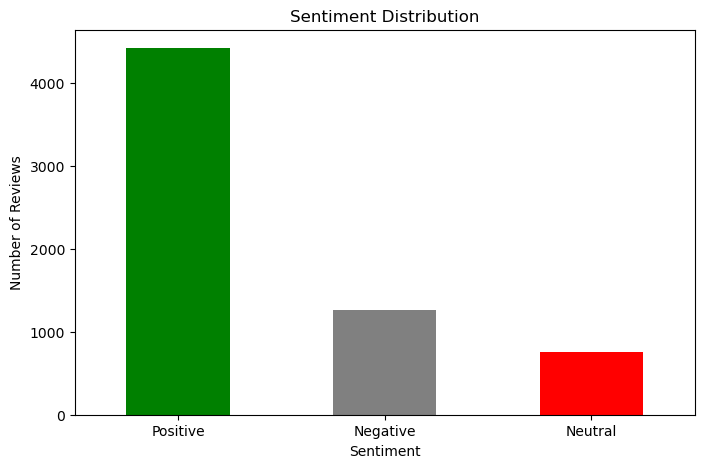

<Figure size 1500x700 with 0 Axes>

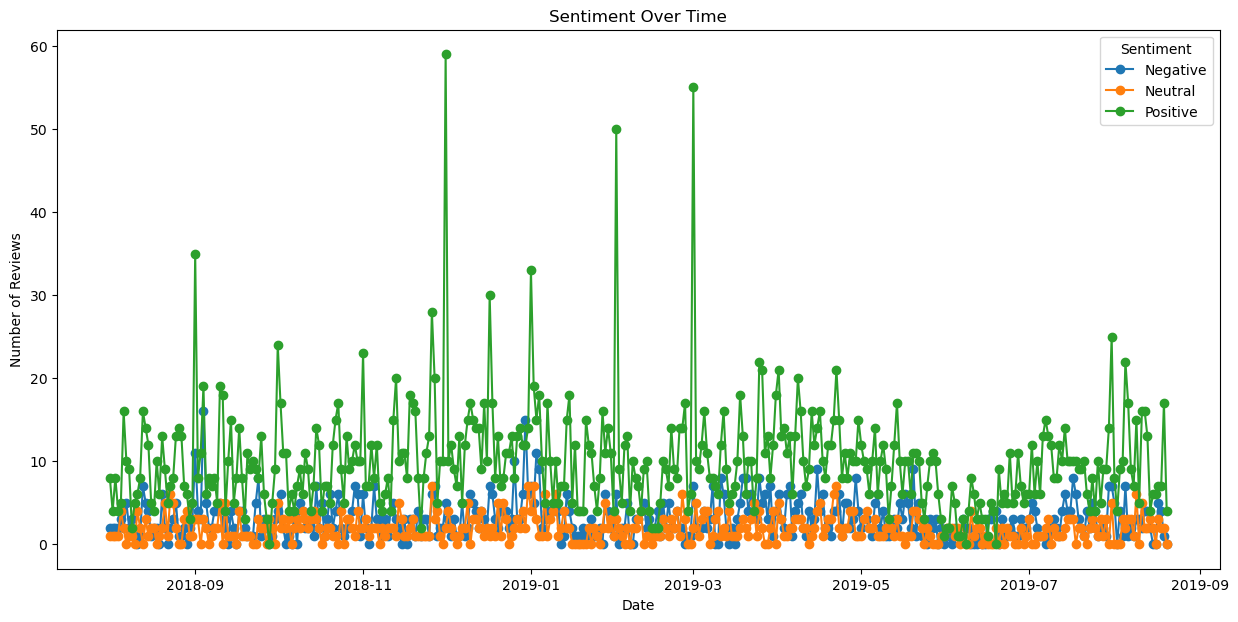

In [31]:
# Sentiment Distribution
sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Sentiment Over Time
# Group by date and sentiment to count occurrences of each sentiment per day
sentiment_over_time = data.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 7))
sentiment_over_time.plot(kind='line', figsize=(15, 7), marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()

In [33]:
# Adding a new column for review length
data['Review Length'] = data['Review'].apply(len)

# Calculating average review length
avg_review_length = data['Review Length'].mean()

print("Average review length:", avg_review_length)

Average review length: 238.5110111662531


<Axes: >

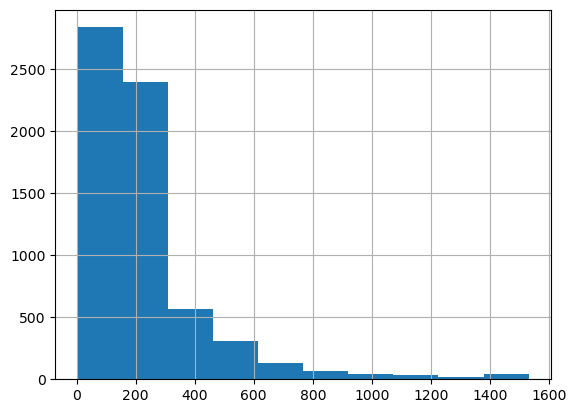

In [39]:
data["Review Length"].hist()

# Terminated